**https://fivethirtyeight.com/features/where-police-have-killed-americans-in-2015/**

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from lxml import etree
from unicodedata import normalize
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [230]:
df = pd.read_csv('police_killings.csv', encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  467 non-null    object 
 1   age                   467 non-null    object 
 2   gender                467 non-null    object 
 3   raceethnicity         467 non-null    object 
 4   month                 467 non-null    object 
 5   day                   467 non-null    int64  
 6   year                  467 non-null    int64  
 7   streetaddress         463 non-null    object 
 8   city                  467 non-null    object 
 9   state                 467 non-null    object 
 10  latitude              467 non-null    float64
 11  longitude             467 non-null    float64
 12  state_fp              467 non-null    int64  
 13  county_fp             467 non-null    int64  
 14  tract_ce              467 non-null    int64  
 15  geo_id                4

In [10]:
df.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [15]:
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [231]:
df.drop('county_bucket', axis=1, inplace=True)

In [232]:
df = df[df['age']!='Unknown']
df = df[df['raceethnicity']!='Unknown']

In [233]:
df['age'] = df['age'].astype('int64')

In [234]:
df['streetaddress'] = df['streetaddress'].fillna('Unknown')

Text(0, 0.5, 'Race/Ethnicity')

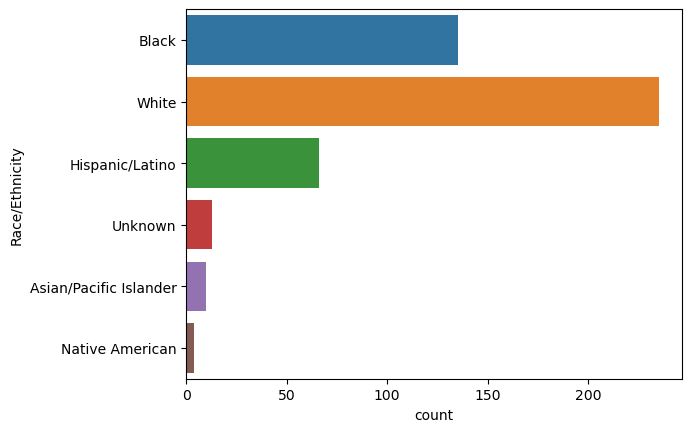

In [9]:
sns.countplot(data=df, y='raceethnicity', orient='v')
plt.ylabel('Race/Ethnicity')

In [10]:
print('Lowest Age:', df['age'].min())
print('Highest Age:', df['age'].max())

Lowest Age: 16
Highest Age: 87


<Axes: xlabel='count', ylabel='age'>

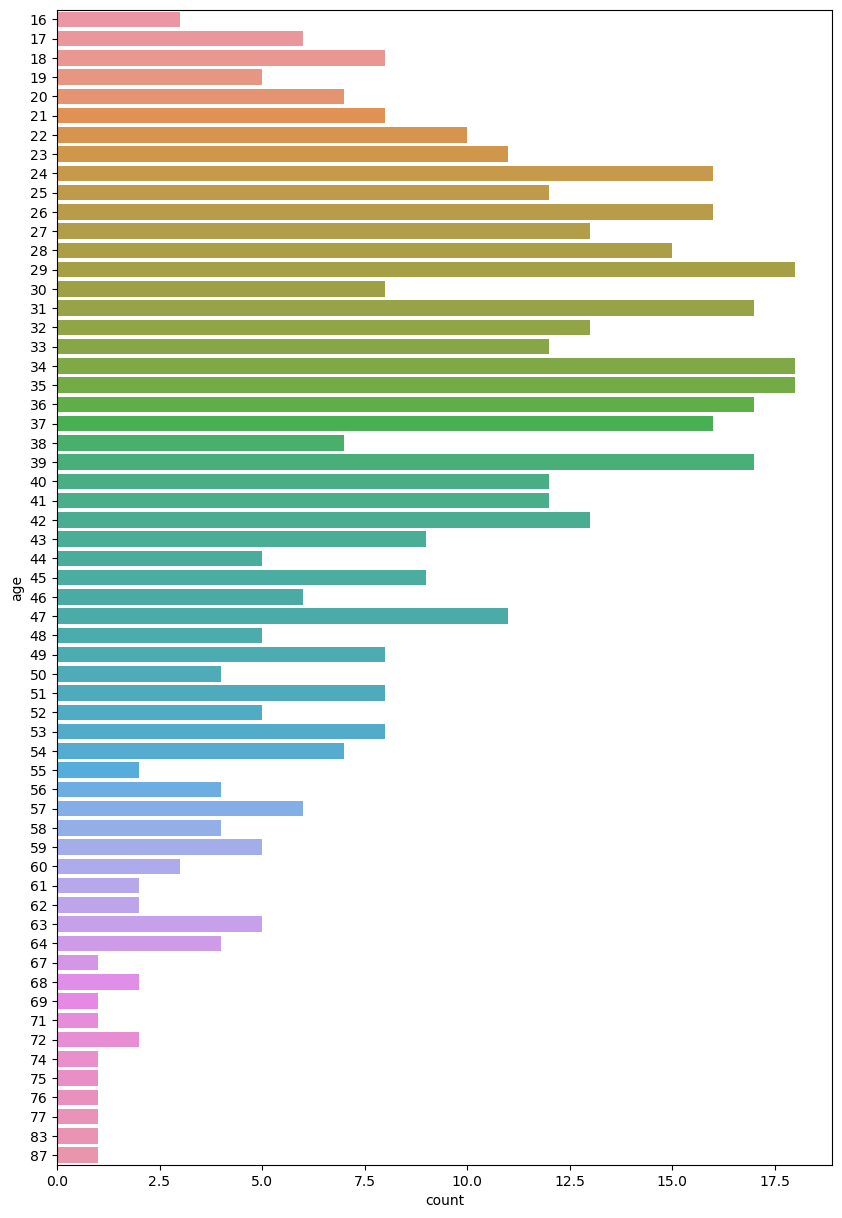

In [11]:
age_range = df.sort_values('age', ascending=True)['age'].unique()

plt.figure(figsize=(10,15))
sns.countplot(data=df, y='age', orient='v', order=age_range)

<Axes: xlabel='month', ylabel='count'>

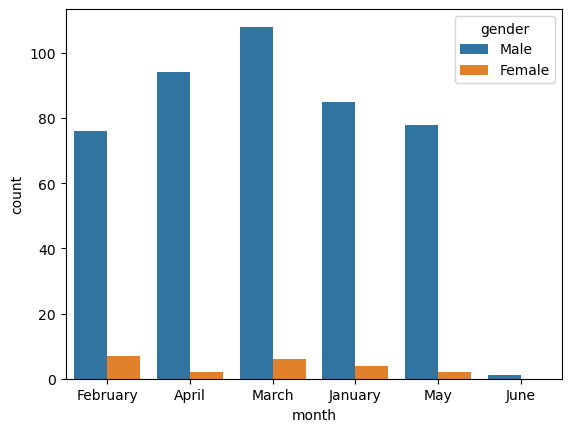

In [12]:
sns.countplot(data=df, x='month', hue='gender')

<Axes: xlabel='month', ylabel='count'>

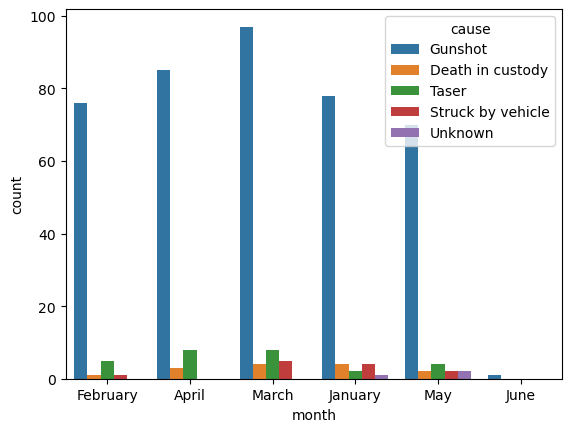

In [66]:
sns.countplot(data=df, x='month', hue='cause')

<Axes: xlabel='cause', ylabel='count'>

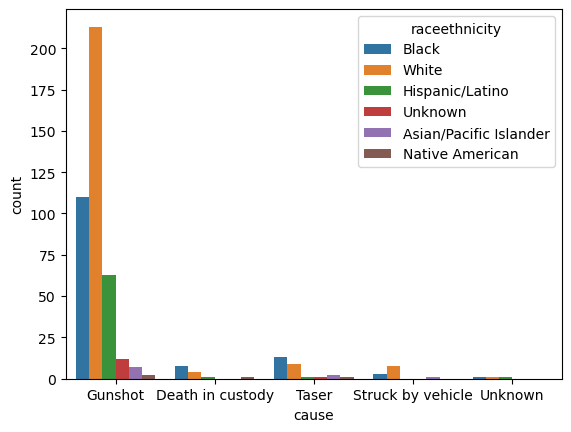

In [68]:
sns.countplot(data=df, x='cause', hue='raceethnicity')

<Axes: xlabel='count', ylabel='state'>

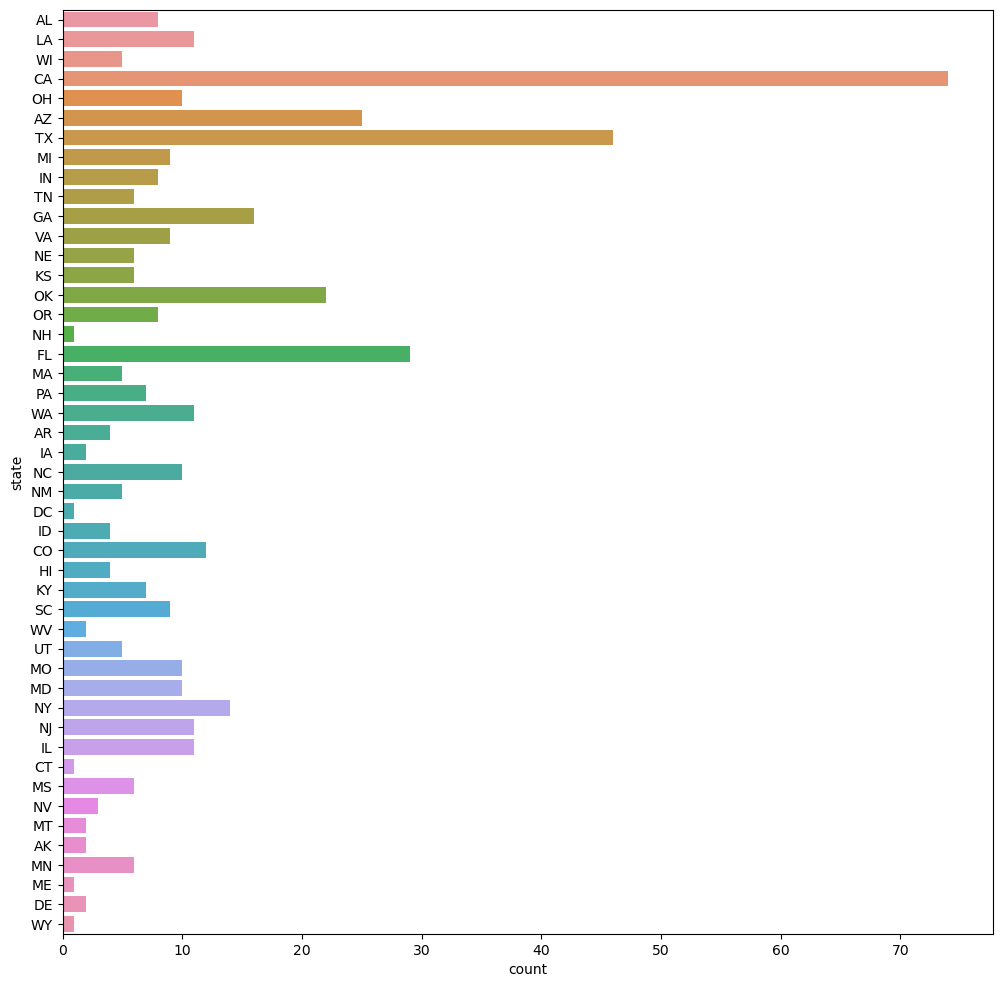

In [22]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, y='state',orient='v')

In [236]:
race_count = df.groupby('raceethnicity').count()[['age']].reset_index()
race_count = race_count.rename({'age': 'killed'}, axis=1)
race_count['% of killed'] = race_count['killed']/race_count['killed'].sum()*100
race_count = race_count.round(1)

In [235]:
cause_count = df.groupby(['raceethnicity','cause']).count()
cause_count = cause_count[['name']]
cause_count = cause_count.rename({'name': 'killed'},axis=1)

<Axes: xlabel='count', ylabel='raceethnicity'>

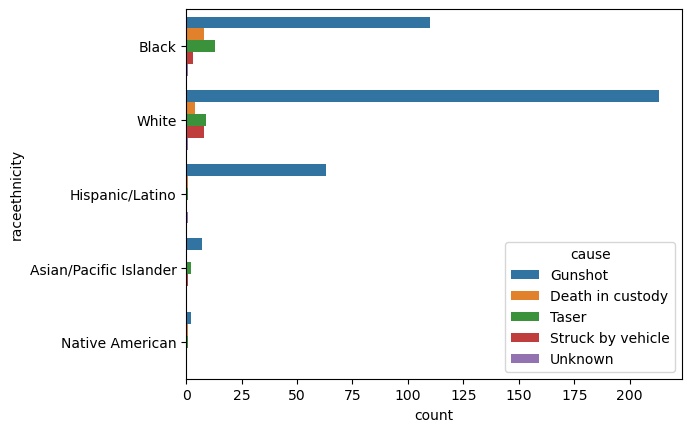

In [111]:
sns.countplot(data=df, y='raceethnicity', hue='cause', orient='v')

Text(0.5, 1.0, 'Race % of Killed in 2015 America')

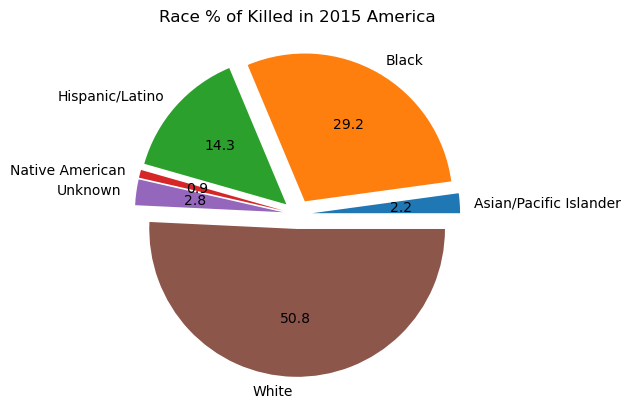

In [115]:
plt.pie(x=race_count['killed'],
        labels=race_count['raceethnicity'],
        explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       autopct = '%1.1f', 
)

plt.title('Race % of Killed in 2015 America')

Text(0, 0.5, 'Age')

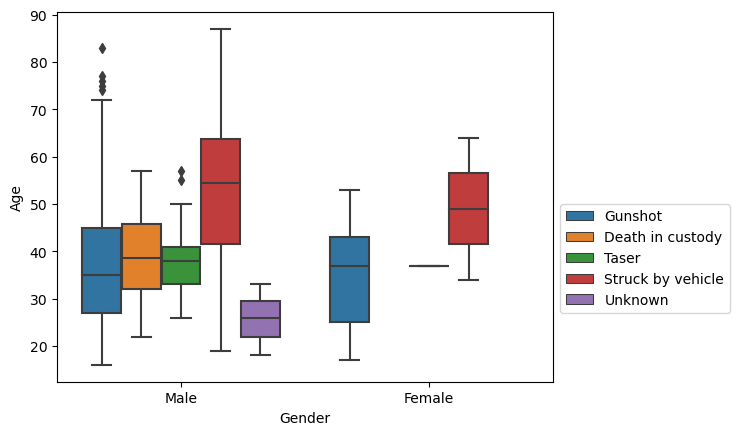

In [116]:
sns.boxplot(data = df, x = "gender", y = "age", hue='cause')
plt.legend(bbox_to_anchor=(1,0.5))

plt.xlabel('Gender')
plt.ylabel('Age')

Text(46.972222222222214, 0.5, 'Age')

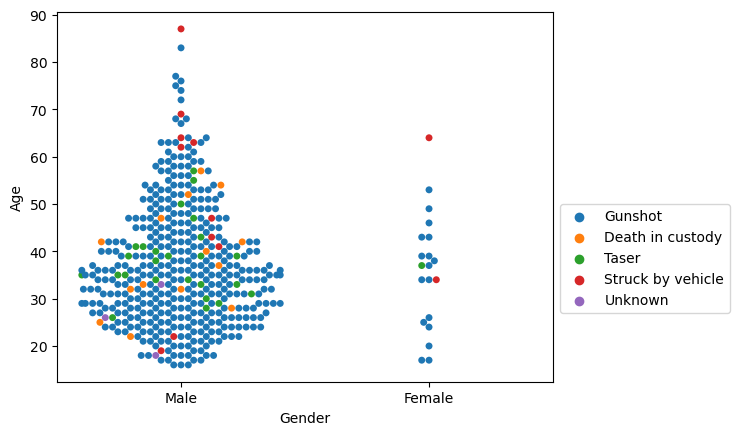

In [117]:
sns.swarmplot(data=df, x='gender', y='age', hue='cause')
plt.legend(bbox_to_anchor=(1,0.5))

plt.xlabel('Gender')
plt.ylabel('Age')

In [237]:
top_10_cities = df['city'].value_counts().head(10)

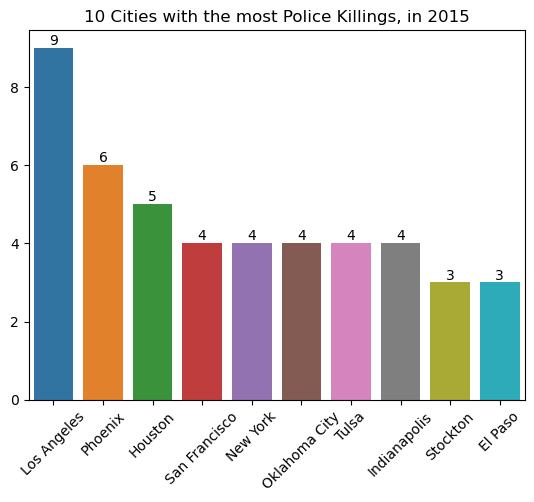

In [119]:
ax = sns.barplot(x = top_10_cities.index,
y = top_10_cities.values, data = df)


plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

plt.title('10 Cities with the most Police Killings, in 2015')
plt.show()

In [238]:
avg_income = df[df['raceethnicity']!= 'Unknown']
avg_income = avg_income.groupby('raceethnicity').mean(numeric_only=True)[['h_income']].reset_index()

Text(0.5, 0, 'Race/Ethnicity')

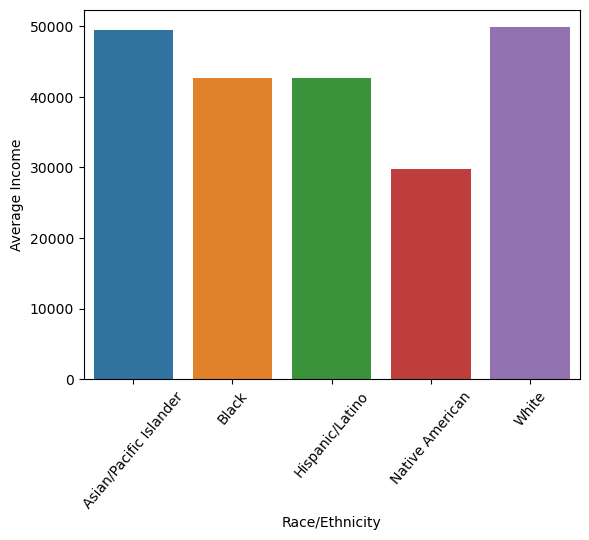

In [121]:
sns.barplot(x='raceethnicity', y='h_income', data=avg_income)
plt.xticks(rotation=50)
plt.ylabel('Average Income')
plt.xlabel('Race/Ethnicity')

In [239]:
state_count = df.groupby('state').count()[['age']].reset_index()

In [252]:
state_count['text'] = 'Killed: ' + state_count['age'].astype(str)

In [253]:
data = dict(type='choropleth',
           colorscale = 'reds',
            reversescale = False,
           locations = state_count['state'],
           locationmode = 'USA-states',
           z = state_count['age'],
            text=state_count['text'],
           marker = dict(line = dict(color = 'rgb(12,12,12)', width=1)),
           colorbar= {'title': 'Killed'},
           )

In [243]:
layout = dict(title = 'Police Killings in America, 2015',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [254]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)